<h2><b>pyLIQTR: Problem Instances</b></h2>
<font size="3">

<hr>
DISTRIBUTION STATEMENT A. Approved for public release. Distribution is unlimited.

This material is based upon work supported by the Under Secretary of Defense for
Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions,
findings, conclusions or recommendations expressed in this material are those of the
author(s) and do not necessarily reflect the views of the Under Secretary of Defense
for Research and Engineering.

© 2023 Massachusetts Institute of Technology.

The software/firmware is provided to you on an As-Is basis

Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part
252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government
rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed
above. Use of this work other than as specifically authorized by the U.S. Government
may violate any copyrights that exist in this work.
<hr><hr>
</font>

<h3><u>1. Overview</u></h3>

`pyLIQTR` passes problem inputs (operators, matrices, etc.) to encodings through descendants the `ProblemInstance` class.  These data include the  terms that define an operator as well as parameters such as the number of required data qubits. Family-specific descendants like `LatticeInstance` provide additional, finely-grained routines that can be useful for  restrictive classes of probelms.  

This notebook demonstrates a few of our pre-generated instances, which are suitable for many physical problems.  We do not discuss how to build new instances in this notebook (yet). However, the details should become apparent after examining the source code for the provided instances.



<hr>

In [27]:
import numpy                                      as  np
import pyLIQTR.clam                               as  clam

from   pyLIQTR.ProblemInstances.getInstance       import getInstance, validProblemInstances

from   pyLIQTR.clam.lattice_definitions           import *


<h3><u>2. Getting Started</u></h3>

`pyLIQTR` includes out-of-the-box support for several problem instances:

In [28]:
validProblemInstances

['Lattice',
 'FermiHubbard',
 'Heisenberg',
 'ElectronicStructure',
 'TransverseFieldIsing',
 'ChemicalHamiltonian']

These are defined as follows:

<ol>
<li> <b>ChemicalHamiltonian</b> - Electronic structure problems with local basis sets (Gaussian or Slater-type orbitals). </li>
<li> <b>ElectronicStructure</b> - Electronic structure for periodic systems (nonlocal or semi-local basis sets). </li>
<li> <b>FermiHubbard</b> - A problem instance crafted specifically for the Fermi-Hubbard model.</li>
<li> <b>Heisenberg</b> - A general Heisenberg model on arbitrary lattices. </li>
<li> <b>Lattice</b> - Spin or fermionic Hamiltonians defined arbitrary lattices / graphs ( restricted to spin systems in this pre-release). </li>
<li> <b>TransverseFieldIsing</b> - A problem instance crafted specifically for the transverse-field Ising model </li>

<ol>

The `ChemicalHamiltonian` `ElectronicStructure` and electronic structure instances are described in separate tutorials. This notebook introduces  the remaining instances through pedagogical examples.

<h5><b><u>2.1. Heisenberg Model (Square Lattice)</u></b></h5>


The Heisenberg model can be defined on a lattice of arbitrary dimensionality or symmetry:

\begin{equation}
H =   \sum_{\mu, \langle p, q \rangle} J^\mu_{p,q}\, (\sigma^\mu_{p} \otimes \sigma^\mu_{q}) + \sum_{\mu, p} h^{\mu}_{p} \, \sigma^\mu_{p}.
\end{equation}

We label lattice sites with composite indices $p,q$ and use angle brackets denote summation over spatially nearest-neighbor pairs. The index $\mu \in \{x,y,z\}$ specifies the Pauli operators $\sigma^\mu$, which we define according to the "physicist's convention." The first term in this Hamiltonian gives a bilinear spin-spin coupling of strength $J^\mu_{p,q}$ and the second specifies local fields of magnitude $ h^{\mu}_{p}$. 

Our `Heisenberg` instance provides a common version of this model (see the `Lattice` instance for a more general scenario).  More specifically, the instance provides nearest-neighbor spin couplings and fields that are the same for every lattice site:

\begin{equation}
H =   \sum_{\langle p, q \rangle} \big[J^x (X_p \otimes X_q) + J^y( Y_p \otimes Y_q ) + J_z (Z_p \otimes Z_q) \big] + \sum_{ p}  (h^x X_p + h^y Y_p + h^z Z_p)
\end{equation}

We can initialize this on a periodic, $4 \times 4$ square lattice with default coefficients:

In [29]:
model = getInstance('Heisenberg',shape=(4,4),pbcs=(True,True))

Or with user-specified coefficients that are be passed as tuples for $J^\mu$ and $h^\mu$:

In [30]:
model = getInstance('Heisenberg',shape=(4,4),J=(1.0,1.0,1.0),h=(-0.5,0.0,0.5))

The Hamiltonian terms in the repeating unit are:

In [31]:
model.print_unit_cell()


0-Skeleton:

	
Site A:

	Basis:		s0 = [0 0]   
	Operators:	(-0.5)*X  +  (0.5)*Z


1-Skeleton:

	
Edge _:

	Basis:		s0 = [0 0]   s1 = [0 1]   
	Operators:	(1.0)*XX  +  (1.0)*YY  +  (1.0)*ZZ

	
Edge _:

	Basis:		s0 = [0 0]   s1 = [1 0]   
	Operators:	(1.0)*XX  +  (1.0)*YY  +  (1.0)*ZZ




Deriviatives  of the `LatticeInstance` class have a method `draw_lattice()` which provides a convenient graphical representation of the system:

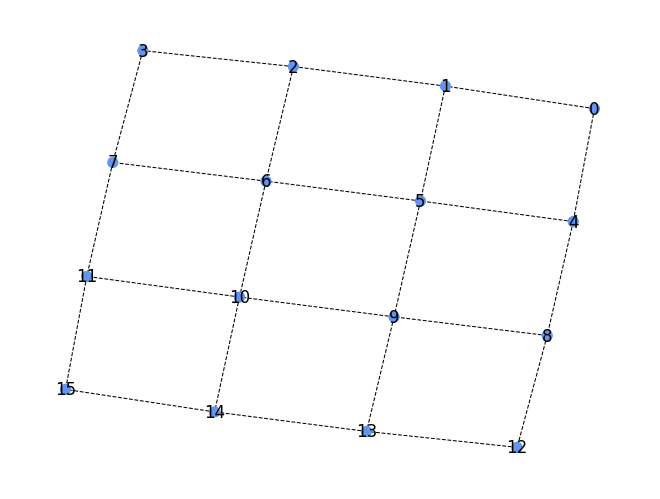

In [32]:
model.draw_lattice()

This model is automaticaly normalized upon instantiation.  The individual terms in the Hamiltonian $H = \sum c_i \Lambda_i$ can be obtained in a compact Pauli-string LCU representation (format:  `[(target qubits), 'operators', constant]`):

In [33]:
for string in model.yield_PauliLCU_Info(return_as='arrays'):
    print(string)

([0], 'X', -0.005681818181818182)
([0], 'Z', 0.005681818181818182)
([1], 'X', -0.005681818181818182)
([1], 'Z', 0.005681818181818182)
([2], 'X', -0.005681818181818182)
([2], 'Z', 0.005681818181818182)
([3], 'X', -0.005681818181818182)
([3], 'Z', 0.005681818181818182)
([4], 'X', -0.005681818181818182)
([4], 'Z', 0.005681818181818182)
([5], 'X', -0.005681818181818182)
([5], 'Z', 0.005681818181818182)
([6], 'X', -0.005681818181818182)
([6], 'Z', 0.005681818181818182)
([7], 'X', -0.005681818181818182)
([7], 'Z', 0.005681818181818182)
([8], 'X', -0.005681818181818182)
([8], 'Z', 0.005681818181818182)
([9], 'X', -0.005681818181818182)
([9], 'Z', 0.005681818181818182)
([10], 'X', -0.005681818181818182)
([10], 'Z', 0.005681818181818182)
([11], 'X', -0.005681818181818182)
([11], 'Z', 0.005681818181818182)
([12], 'X', -0.005681818181818182)
([12], 'Z', 0.005681818181818182)
([13], 'X', -0.005681818181818182)
([13], 'Z', 0.005681818181818182)
([14], 'X', -0.005681818181818182)
([14], 'Z', 0.00568

We can also obtain identity-padded strings if desired (often unnecessary but provided for fringe cases):

In [34]:
for string in model.yield_PauliLCU_Info(return_as='strings'):
    print(string)

('XIIIIIIIIIIIIIII', -0.005681818181818182)
('ZIIIIIIIIIIIIIII', 0.005681818181818182)
('IXIIIIIIIIIIIIII', -0.005681818181818182)
('IZIIIIIIIIIIIIII', 0.005681818181818182)
('IIXIIIIIIIIIIIII', -0.005681818181818182)
('IIZIIIIIIIIIIIII', 0.005681818181818182)
('IIIXIIIIIIIIIIII', -0.005681818181818182)
('IIIZIIIIIIIIIIII', 0.005681818181818182)
('IIIIXIIIIIIIIIII', -0.005681818181818182)
('IIIIZIIIIIIIIIII', 0.005681818181818182)
('IIIIIXIIIIIIIIII', -0.005681818181818182)
('IIIIIZIIIIIIIIII', 0.005681818181818182)
('IIIIIIXIIIIIIIII', -0.005681818181818182)
('IIIIIIZIIIIIIIII', 0.005681818181818182)
('IIIIIIIXIIIIIIII', -0.005681818181818182)
('IIIIIIIZIIIIIIII', 0.005681818181818182)
('IIIIIIIIXIIIIIII', -0.005681818181818182)
('IIIIIIIIZIIIIIII', 0.005681818181818182)
('IIIIIIIIIXIIIIII', -0.005681818181818182)
('IIIIIIIIIZIIIIII', 0.005681818181818182)
('IIIIIIIIIIXIIIII', -0.005681818181818182)
('IIIIIIIIIIZIIIII', 0.005681818181818182)
('IIIIIIIIIIIXIIII', -0.005681818181818182)

The normalization factor is the 1-norm of the coefficients $\alpha = \sum_i |\alpha_i|$, which obtained via:

In [35]:
model.get_alpha()

88.0

We can also obtain a matrix represenntation of this operator.  This is demonstrated below for a three-site, one-dimensional Heisenberg model.  Note this method is inefficient and an update is currently in process:

In [36]:
model = getInstance('Heisenberg',shape=(1,3))
model.matrix().real

array([[0.38888889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38888889, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38888889, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05555556, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05555556,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05555556]])

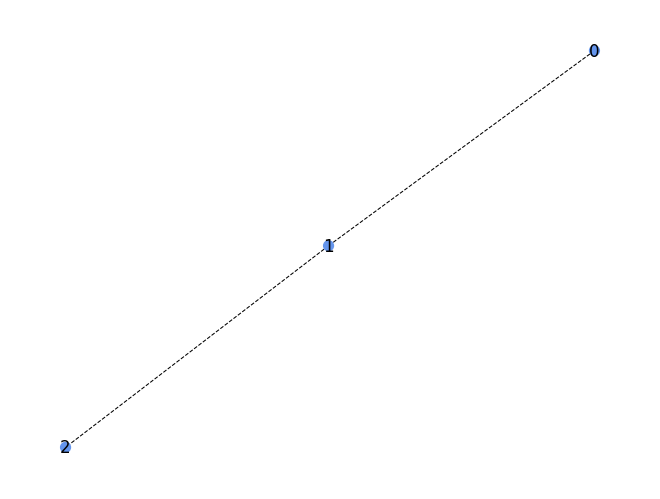

In [37]:
model.draw_lattice()

<h5><b><u>2.2. Transverse-Field Ising on the Cylinder</u></b></h5>

As a more exotic example, we define a transverse-field Ising model,


\begin{equation}
H = J\sum_{i,j} Z_i \otimes Z_j + \sum_i (h Z_i + g  X_i),
\end{equation}

 on an $8 \times 12$ square lattice that is periodic along one of its dimensions (i.e., a cylinder).  We set parameters $J = -1.0$ and $g=1.0$ that would be critical for the one-dimensional counterpart.  This can be accomplished as a special case of the `Heisenberg` instance:

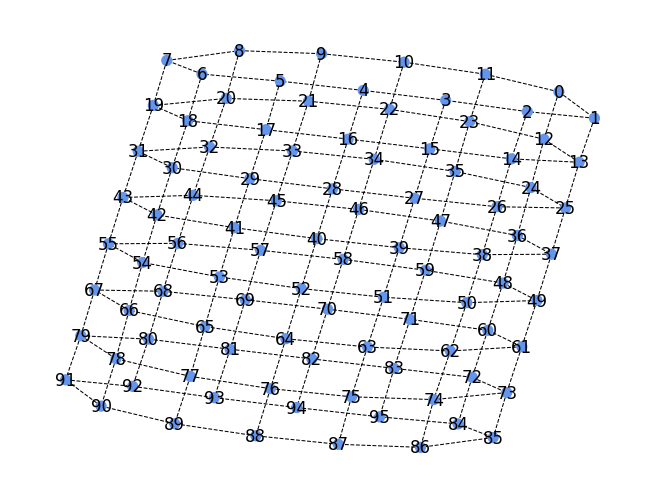

In [38]:
model = getInstance('Heisenberg',J=(0.0,0.0,-1.0),h=(1.0,0.0,0.0),shape=(8,12),pbcs=(False,True))
model.draw_lattice()

We verify the constituent terms:

In [39]:
model.print_unit_cell()


0-Skeleton:

	
Site A:

	Basis:		s0 = [0 0]   
	Operators:	(1.0)*X


1-Skeleton:

	
Edge _:

	Basis:		s0 = [0 0]   s1 = [0 1]   
	Operators:	(-1.0)*ZZ

	
Edge _:

	Basis:		s0 = [0 0]   s1 = [1 0]   
	Operators:	(-1.0)*ZZ




<h5><b><u>2.3. Heisenberg Model: Triangular Lattice</u></b></h5>

The `clam` module of `pyLIQTR`  provides a general mechanism to define Hamiltonians on arbitrary lattices and graphs.  Here, we define a <i>term dictionary</i> that specifies the Pauli operators on distinctly-labeled sites (A, B, or C) of a triangular lattice:

\begin{equation}
H =   J \sum_{\langle p, q \rangle} \big[ X_p \otimes X_q +  Y_p \otimes Y_q + Z_p \otimes Z_q \big] + \sum_{ p}  (h^x_p X_p + h^z_p Z_p)
\end{equation}

with $J = -1.0$ and

\begin{equation*}
h^x_p = \begin{cases}
   -J & \text{for}\,\, p \in A \\
   0 & \text{for}\,\, p \in B \\
   -J & \text{for}\,\, p \in C
\end{cases}
\end{equation*}, \hspace{40pt} \begin{equation*}
h^z_p = \begin{cases}
   -J & \text{for}\,\, p \in A \\
   -J/2 & \text{for}\,\, p \in B \\
   J/10 & \text{for}\,\, p \in C
\end{cases}
\end{equation*}

The term dictionary is defined intuitively based on the above (`'_'` denotes application to all sites):

In [40]:
td       =  {}
td['A']  =  [ [  'Z', 'X', ],  [  1.0, 1.0 ] ]
td['B']  =  [ [  'Z', 'X', ],  [  0.5, 0.0 ] ]
td['C']  =  [ [  'Z', 'X', ],  [  -0.1, 1.0 ] ]
td['_']  =  [ [ 'XX', 'YY', 'ZZ' ],  [ -1.0, -1.0, -1.0 ] ]

While the model is instantiated using (note that the repeats in `shape=` are currently a bit unintiutive):

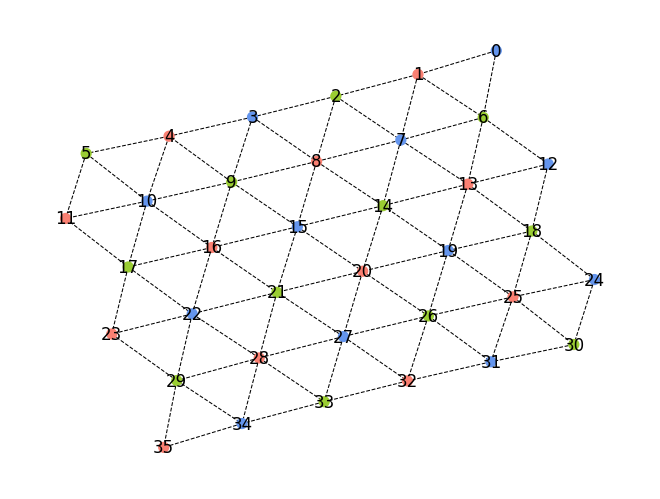

In [41]:
model = getInstance( 'Heisenberg', 
                     shape=(3,2), 
                     cell=TriangularLattice, 
                     cell_subtype='triangle-3', 
                     terms=td, )
model.draw_lattice()



In [42]:
model.print_unit_cell()


0-Skeleton:

	
Site A:

	Basis:		s0 = [0 0]   
	Operators:	(1.0)*Z  +  (1.0)*X

	
Site B:

	Basis:		s0 = [0 1]   
	Operators:	(0.5)*Z  +  (0.0)*X

	
Site C:

	Basis:		s0 = [0 2]   
	Operators:	(-0.1)*Z  +  (1.0)*X

	
Site C:

	Basis:		s0 = [1 0]   
	Operators:	(-0.1)*Z  +  (1.0)*X

	
Site A:

	Basis:		s0 = [1 1]   
	Operators:	(1.0)*Z  +  (1.0)*X

	
Site B:

	Basis:		s0 = [1 2]   
	Operators:	(0.5)*Z  +  (0.0)*X


1-Skeleton:

	
Edge _:

	Basis:		s0 = [0 0]   s1 = [0 1]   
	Operators:	(-1.0)*XX  +  (-1.0)*YY  +  (-1.0)*ZZ

	
Edge _:

	Basis:		s0 = [0 0]   s1 = [1 0]   
	Operators:	(-1.0)*XX  +  (-1.0)*YY  +  (-1.0)*ZZ

	
Edge _:

	Basis:		s0 = [0 1]   s1 = [0 2]   
	Operators:	(-1.0)*XX  +  (-1.0)*YY  +  (-1.0)*ZZ

	
Edge _:

	Basis:		s0 = [0 1]   s1 = [1 0]   
	Operators:	(-1.0)*XX  +  (-1.0)*YY  +  (-1.0)*ZZ

	
Edge _:

	Basis:		s0 = [0 1]   s1 = [1 1]   
	Operators:	(-1.0)*XX  +  (-1.0)*YY  +  (-1.0)*ZZ

	
Edge _:

	Basis:		s0 = [0 2]   s1 = [0 3]   
	Operators:	(-1.0)*XX  +  (-1.0

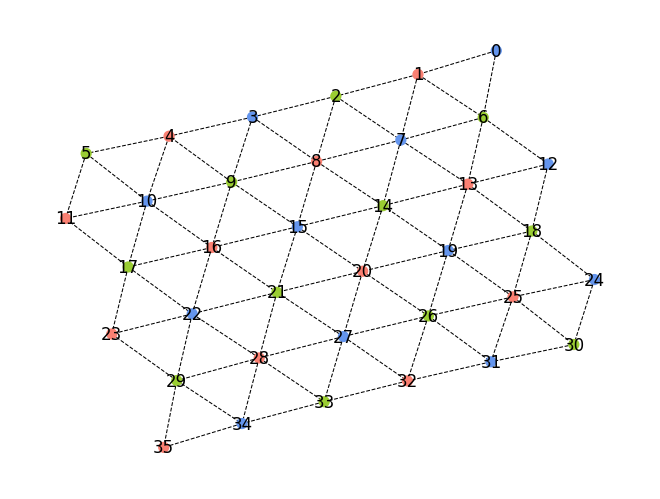

In [43]:
model.draw_lattice()

<h5><b><u>2.4. Fermi-Hubbard: Cubic Lattice</u></b></h5>

The `FermiHubbard` instance accommodates a Hamiltonian of the form:

\begin{equation}
H = \underbrace{-J\sum_{\langle p,q \rangle,\sigma} \left[c^\dagger_{p,\sigma} c_{q,\sigma} + c^\dagger_{q,\sigma} c_{p,\sigma}\right]}_{\text{Hopping}} + \underbrace{U \sum_{\langle p \rangle} n_{p,\uparrow} n_{p,\downarrow}}_{\text{Density Interaction}}.
\end{equation}

We have written this example for a single band, e.g., with one orbital per lattice site.  The first term in this Hamiltonian corresponds to a standard tight-binding model.  In the absence of interactions ($U = 0$) this  describes the propagation of fermions between sites at a rate determined by $J$.  The second term delivers a notorious degree of complexity - here, the parameter $U$ specifies the strength of many-body interactions.  These interations modulate the effective hopping rate while tuning on-site carrier and spin densities. Our notation labels the lattice sites using composite indices $p,q$ and introduces $\sigma \in \{\uparrow,\downarrow\}$ to denote the spin eigenstate (we can add an orbital index to $p,q$ in more complex arrangements).  Angle brackets denote summation over nearest-neighbor pairs, while the operators $c^\dagger_{p,\sigma}, c_{p,\sigma}$ describe the creation or annihilation of a spin-$\sigma$ fermion on the  $p$-th site.  The  $n_{k,\sigma} = c^\dagger_{k,\sigma} c_{k,\sigma}$ are the corresponding number operators.

We define this on a $3 \times 3 \times 3$ cubic lattice with $U/J = 4.0$ as follows:

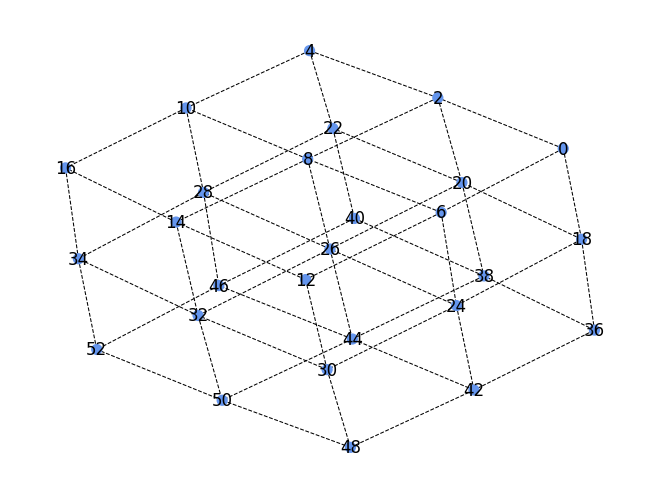

In [44]:
model = getInstance( 'FermiHubbard', shape=(3,3,3), cell=CubicLattice)
model.draw_lattice()

<b>Note:</b> Options for this instance are (temporarily) more restricted than for spin models.

As described in the Fermi-Hubbard tutorials, the model is actually split into bipartite sublattices for up- and down-spin channels.  These can be depicted simultaneously if we pass `single_spin=False` to the drawing routine:


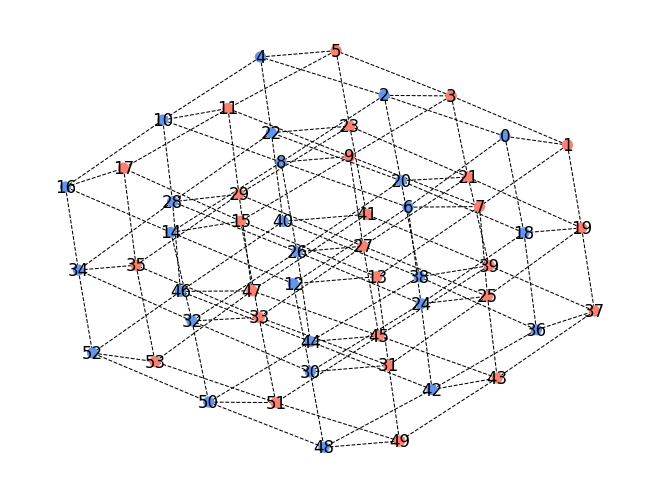

In [45]:
model.draw_lattice(single_spin=False)

We also can scrutinize the constituent terms in a spin-operator basis.  The output below uses `XZX` etc. to denote that a string of Pauli $Z$ operators should lie between the $X$ terms if they are not consecutive.  Note that basis / qubit indicies refer to the $X$ or $Y$ terms in this case.  These strings arise from the Jordan-Wigner transformation, which has been used in mapping fermions to spins.

In [46]:
model.print_unit_cell()


0-Skeleton:

	
Site A:

	Basis:		s0 = [0 0 0]   
	Operators:	(1.0)*Z

	
Site A_d:

	Basis:		s0 = [0 0 1]   
	Operators:	(1.0)*Z


1-Skeleton:

	
Edge _:

	Basis:		s0 = [0 0 0]   s1 = [1 0 0]   
	Operators:	(-0.5)*XZX  +  (-0.5)*YZY

	
Edge __d:

	Basis:		s0 = [0 0 1]   s1 = [1 0 1]   
	Operators:	(-0.5)*XZX  +  (-0.5)*YZY

	
Edge _:

	Basis:		s0 = [0 0 0]   s1 = [0 1 0]   
	Operators:	(-0.5)*XZX  +  (-0.5)*YZY

	
Edge __d:

	Basis:		s0 = [0 0 1]   s1 = [0 1 1]   
	Operators:	(-0.5)*XZX  +  (-0.5)*YZY

	
Edge _:

	Basis:		s0 = [0 0 0]   s1 = [0 0 2]   
	Operators:	(-0.5)*XZX  +  (-0.5)*YZY

	
Edge __d:

	Basis:		s0 = [0 0 1]   s1 = [0 0 3]   
	Operators:	(-0.5)*XZX  +  (-0.5)*YZY

	
Edge A_d:

	Basis:		s0 = [0 0 0]   s1 = [0 0 1]   
	Operators:	(0.5)*ZZ




<h5><b><u>2.5. Electronic Structure: Dual Plane-Waves</u></b></h5>

A dedicated instance handles electronic structure problems in the plane-wave or dual plane-wave bases.  These are generated using coefficients of the electronic structure Hamiltonian as input.  The latter can be computed using `pyLIQTR`'s `PEST` module or external tools:

In [47]:
example_ham_filename = "../Examples/ApplicationInstances/PeriodicChemistry/example.ham.hdf5"
example_grid_filename = "../Examples/ApplicationInstances/PeriodicChemistry/example.grid.hdf5"
model = getInstance('ElectronicStructure',filenameH=example_ham_filename,filenameG=example_grid_filename)
print(model)

Unable to open ../Examples/ApplicationInstances/PeriodicChemistry/example.ham.hdf5 and ../Examples/ApplicationInstances/PeriodicChemistry/example.grid.hdf5. Check filename and path. To generate new hdf5 files see 'pest-intro.ipynb' 
ElectronicStructure
	Hamiltonian filename:../Examples/ApplicationInstances/PeriodicChemistry/example.ham.hdf5	Grid filename:../Examples/ApplicationInstances/PeriodicChemistry/example.grid.hdf5
	N:0	M_vals:[0 0 0]


The constituent terms can be presented as Pauli strings (post Jordan-Wigner)

In [48]:
for string in model.yield_PauliLCU_Info(return_as='arrays'):
    print(string)

Or as coefficients folowing the optimized block encoding from [Phys. Rev. X <b>8</b>, 041015], which gives a $T$-complexity that is linear in the number of problem orbtials.  These include the kinetic terms:

In [49]:
for string in model.yield_LinearT_Info(termSelect='T'):
    print(string)

The electron-nuclear potential terms:

In [50]:
for string in model.yield_LinearT_Info(termSelect='U'):
    print(string)

And the electron-electron terms:

In [51]:
for string in model.yield_LinearT_Info(termSelect='V'):
    print(string)

Last but not least, the normalization is obtained via:

In [52]:
model.get_alpha('LinearT')

0